In [1]:
## Importing essential libraries
import pandas as pd # to load the data, 
import numpy as np # mathematical intitution

import seaborn as sns # ploting
import matplotlib.pyplot as plt # ploting

### Importing dataset and EDA

!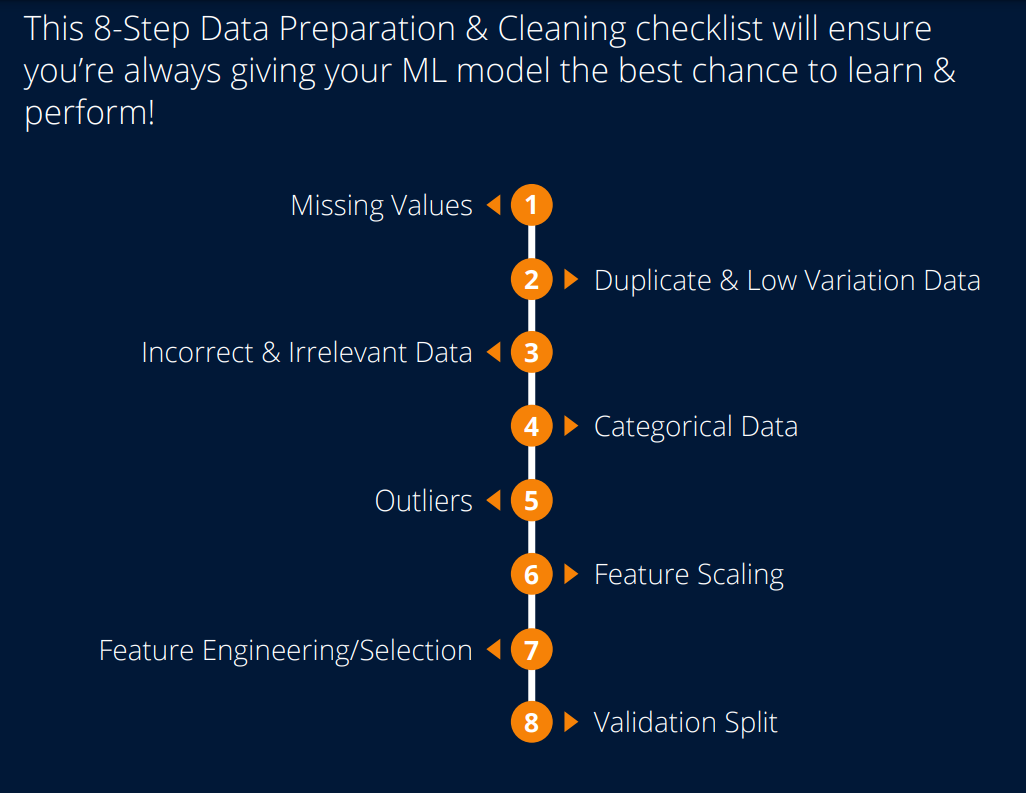

In [2]:
## Importing datasets
df = pd.read_csv('car_price.csv')

In [3]:
## To see top 5 rows of dataset
df.head()

## To see bottom 5 rows of dataset
df.tail()

## To see random 5 rows of dataset
df.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2062,2062,Hyundai Verna 1.4 VTVT,Kolkata,2015,33425,Petrol,Manual,First,17.43 kmpl,1396 CC,105.5 bhp,5.0,NaN,4.50
4033,4033,Ford Fiesta 1.4 Duratec ZXI,Hyderabad,2006,69000,Petrol,Manual,First,16.6 kmpl,1388 CC,68 bhp,5.0,NaN,2.15
1803,1803,Volkswagen Polo GT TSI,Mumbai,2016,28000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.5 bhp,5.0,11.26 Lakh,7.25
960,960,Maruti Alto 800 VXI,Kolkata,2016,26000,Petrol,Manual,First,22.74 kmpl,796 CC,47.3 bhp,5.0,NaN,2.60
3019,3019,Honda City i DTEC V,Ahmedabad,2015,77000,Diesel,Manual,First,26.0 kmpl,1498 CC,98.6 bhp,5.0,NaN,6.98


In [4]:
df.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [5]:
df['Name'].value_counts().any()

True

In [6]:
## To see the dataset information i.e column names, type of column, how many non-null values are present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [7]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [8]:
#We can see that in first column there is only index number given so its better to delete it
df=df.drop('Unnamed: 0',axis=1)

In [9]:
df.shape

(6019, 13)

In [10]:
## To get how many different types of data types are present in dataset 
print("Unique Data type :",len(set(df.dtypes)))
print("Different types of datatypes in dataset are",set(df.dtypes))

Unique Data type : 3
Different types of datatypes in dataset are {dtype('int64'), dtype('float64'), dtype('O')}


In [11]:
## The car name with one frequency does not work for modeling purpose 
df=df.groupby('Name').filter(lambda x : (x['Name'].value_counts()>1).any())

In [12]:
df.shape

(5177, 13)

In [13]:
## we know that mileage , power and Engine featurea are numeric but in dataset its units are also given So its datatype is object
## We will convert object type to data type
df["Engine"] = df["Engine"].str.replace(' CC','')
df['Power'] = df['Power'].str.replace('bhp', '')
df['Mileage'] = df['Mileage'].str.replace('kmpl', '')
df['Mileage'] = df['Mileage'].str.replace('km/kg', '')

In [14]:
## Now for numeric columns we can compute its description
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,5177.000000,5.177000e+03,5147.000000,5177.000000
mean,2013.477303,5.857074e+04,5.271032,9.319218
std,3.106109,9.671200e+04,0.766693,10.469339
min,1998.000000,1.710000e+02,2.000000,0.440000
25%,2012.000000,3.401000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.200000e+04,5.000000,9.990000
max,2019.000000,6.500000e+06,8.000000,97.070000


### Missing Value 

In [15]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 26
Power                  26
Seats                  30
New_Price            4490
Price                   0
dtype: int64

In [16]:
## In this column we have seen how many missing values are present in data 
round(df.isnull().sum()/6019,2)

Name                 0.00
Location             0.00
Year                 0.00
Kilometers_Driven    0.00
Fuel_Type            0.00
Transmission         0.00
Owner_Type           0.00
Mileage              0.00
Engine               0.00
Power                0.00
Seats                0.00
New_Price            0.75
Price                0.00
dtype: float64

In [17]:
## This command is used to delete column from the dataframe
df=df.drop("New_Price",axis=1)

In [18]:
st = 'null'
st.replace('null', '74')

'74'

In [19]:
## Power column contain 'null' values which was not detected using isnull syntax
df['Power']=df.Power.replace('null ',df.Power.mode()[0])

In [20]:
## Mileage is a numeric variable which contain only 2 missing values so we are replacing it by median
df["Mileage"].fillna(df.Mileage.mode(), inplace=True)

In [21]:
df.shape

(5177, 12)

In [22]:
## Our data is big enough so we can delete missing values by using following syntax
df=df.dropna()
df.shape

(5147, 12)

### Duplicate Values 

In [29]:
df = df.drop_duplicates()
df.shape

(5147, 12)

We can see that dataset does not contain duplicate values

### Outlier Detection 

In [30]:
## Outliers are present in numeric type column only so we are going to list numeric type columns
num_type = list(df.select_dtypes(include=['int64','float64']).columns)
print("Numbers of numeric type columns in data are" ,len(num_type))
print("Numeric type columns are " ,num_type)

Numbers of numeric type columns in data are 4
Numeric type columns are  ['Year', 'Kilometers_Driven', 'Seats', 'Price']


C:\Users\shweta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shweta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


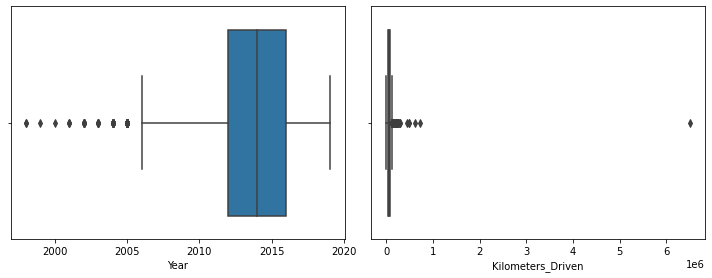

In [35]:
## To visualize numeric type column boxplot is best way
num_features=['Year', 'Kilometers_Driven']

n = 1
plt.figure(figsize=(20,15))

for column in num_features:
    plt.subplot(4,4,n)
    n = n+1
    sns.boxplot(df[column])
    plt.tight_layout()

In [47]:
# df.Kilometers_Driven
q1 = np.percentile(df.Kilometers_Driven,25)
q3 = np.percentile(df.Kilometers_Driven,75)
iqr=q3-q1
print(iqr)
upper_limit=q3+1.5*iqr
print(upper_limit)
print(max(df.Kilometers_Driven))
print(q1-1.5*iqr)
min(df.Kilometers_Driven)

38000.0
129000.0
6500000
-23000.0


171

In [48]:
def outlier(column_name):
    """Outlier detection using Interquartile range"""
    q1=np.percentile(df[column_name],25)
    q3=np.percentile(df[column_name],75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    return upper_limit,lower_limit 

In [49]:
## for year feature from boxplot we can see that outliers are only present in left side
upper_limit,lower_limit=outlier("Year")
##So replacing outliers by 2003
df.loc[df.Year < lower_limit, 'Year'] = 2006
## for Kilometers_Driven feature from boxplot we can see that outliers are only present in right side
upper_limit,lower_limit=outlier("Kilometers_Driven")
##So replacing outliers by its upper_limit
df.loc[df.Kilometers_Driven > upper_limit, 'Kilometers_Driven'] = upper_limit

In [50]:
df.shape

(5147, 12)

### Linear  regression assumptions
- Multicollinearity

In [51]:
df.corr()

,Year,Kilometers_Driven,Seats,Price
Year,1.000000,-0.515433,0.029315,0.329268
Kilometers_Driven,-0.515433,1.000000,0.222979,-0.168231
Seats,0.029315,0.222979,1.000000,0.117809
Price,0.329268,-0.168231,0.117809,1.000000


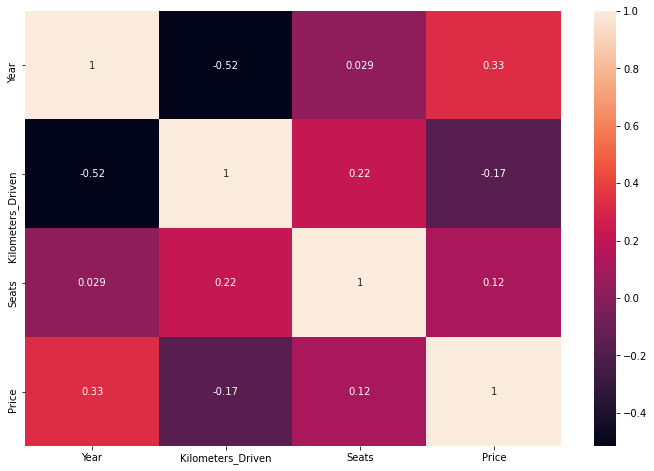

In [ ]:
## Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, ax=ax);

We can observe that All auto correlations are less than 0.60 . So using auto correlation function we can say there is no multicollinearity. But still we are going to check using VIF.

In [52]:
## To check Multicollinearity here we are using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[list(df.select_dtypes(include=['int64','float64']).columns)]
# Price feature is dependent or o/p feature so we are deleting 
X=X.drop('Price',axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature        VIF
0               Year  48.416808
1  Kilometers_Driven   4.868823
2              Seats  50.944503


here we will delete seats feature

In [54]:
df=df.drop('Seats',axis=1)

In [55]:
X = df[list(df.select_dtypes(include=['int64','float64']).columns)]
X=X.drop('Price',axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature       VIF
0               Year  4.615981
1  Kilometers_Driven  4.615981


Now all VIF values are less than 10 after deleting Seats column.So no multicollinearity present in data.

### Converting Categorical variables to Numerical

In [ ]:
LabelEncoder 
one hot enoding | dummy variable
# one way
1st obs--> location_hyd= 1 | location_pune=0 | location_mum=0 | location_delhi=0
2nd obs--> location_hyd= 0 | location_pune=0 | location_mum=0 | location_delhi=1

# 2nd way
1st obs--> 1
2nd obs--> 4

## method 1 - label encoding

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [57]:
## Name column has lots of unique values so we are lable encoding here
df['Name']=le.fit_transform(df['Name'])
df['Engine']=le.fit_transform(df['Engine'])
df['Mileage']=le.fit_transform(df['Mileage'])

## method 2 - one hot enoding or dummy variable

In [59]:
## creating list of column names with dtype object
categorical_features = list(df.columns[df.dtypes == object])
categorical_features

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Power']

In [60]:
## All other columns are nominal type so converting categorical variable to numeric using get_dummy
df=pd.get_dummies(df, columns = categorical_features)
df.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Power_93,Power_93.7,Power_94,Power_94.68,Power_97.7,Power_98.59,Power_98.6,Power_98.82,Power_98.96,Power_99
0,688,2010,72000,322,103,1.75,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,293,2015,41000,218,33,12.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,277,2011,46000,182,11,4.50,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,597,2012,87000,243,12,6.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12,2013,40670,101,49,17.74,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df.sample(5)

,Name,Year,Kilometers_Driven,Mileage,Engine,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Power_93,Power_93.7,Power_94,Power_94.68,Power_97.7,Power_98.59,Power_98.6,Power_98.82,Power_98.96,Power_99
5324,318,2015,59261,296,5,4.25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3373,259,2017,7500,158,30,11.15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2294,226,2011,60000,142,30,4.45,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4081,413,2013,15200,145,9,3.85,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1684,370,2014,34200,114,36,6.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df.shape

(5147, 309)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop('Price',axis=1)
y=df['Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)


In [ ]:
##Standardization of data means convering values in between 0-1. In regression Standardization is important because model is sensitive to outliers.
## Standardizing the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

In [ ]:
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (3602, 308)
y_train (3602,)
x_test (1545, 308)
y_test (1545,)


### Model Building 

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

R square :It is statistical measure of how close the data are to the fitted regression line. 

In [ ]:
r_sq = model.score(x_train , y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.906948575978289


In [ ]:
## It will give output of x_test 
y_pred = model.predict(x_test)

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_pred,y_test)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))


r2 socre is 0.8565904204801766
mean_sqrd_error is== 14.42886061461885
root_mean_squared error of is== 3.798534008616857
